In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import cv2
from lib.render.utils import visualize_image 
from lib.render.camera import Camera
from lib.render.renderer import DeepSDFNormalRender

sphere_eps = 3e-2
azim = 0
elev = -45
dist = 4

ckpt_path = "/home/borth/sketch2shape/logs/save/deepsdf.ckpt"
save_path = f"/home/borth/sketch2shape/temp/data/{azim}-{-elev}-{dist}-normal.png"

camera = Camera(azim=azim, elev=elev, dist=dist, sphere_eps=sphere_eps)
points, rays, mask = camera.unit_sphere_intersection_rays()
model = DeepSDFNormalRender(
    ckpt_path=ckpt_path,
    resolution=256,
    prior_idx=37,
    n_render_steps=100,
    surface_eps=1e-03,
    step_scale=1.5,
    sphere_eps=sphere_eps,
)
device = model.model.device

/home/borth/miniconda3/envs/pytorch3d/lib/python3.9/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.


/home/borth/miniconda3/envs/pytorch3d/lib/python3.9/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.


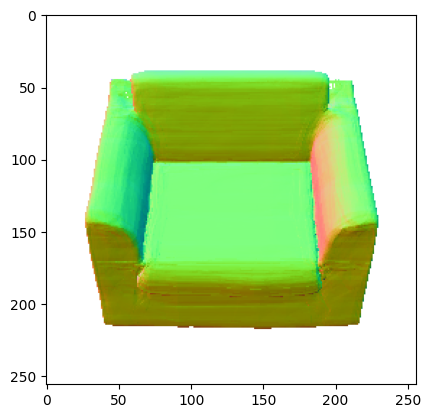

True

In [2]:
normals, mask = model.render_normals(
    points=points.to(device),
    rays=rays.to(device),
    mask=mask.to(device),
)
normal_image = visualize_image(model.normal_to_image(normals, mask))
cv2.imwrite(save_path, cv2.cvtColor(normal_image * 255, cv2.COLOR_RGB2BGR))

In [13]:
min_points, min_sdf, surface_mask = model.sphere_tracing_min_sdf(
    points=points.to(device),
    rays=rays.to(device),
    mask=mask.to(device),
)

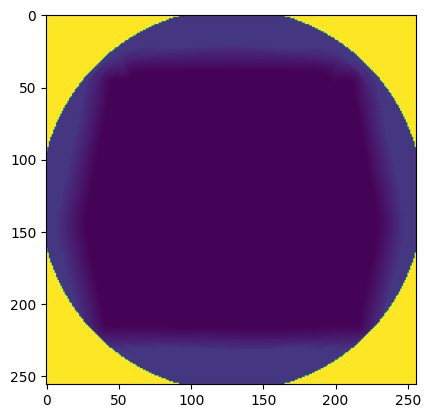

In [22]:
import matplotlib.pyplot as plt
plt.imshow(model.to_image(min_sdf).detach().cpu().numpy())

In [11]:
points.to(device)[mask]

tensor([[ 0.5124,  0.8518, -0.1089],
        [-0.4613,  0.8758, -0.1419],
        [-0.4464,  0.8806, -0.1592],
        [-0.4605,  0.8747, -0.1511],
        [-0.4676,  0.8716, -0.1469],
        [-0.4748,  0.8685, -0.1426],
        [-0.4456,  0.8793, -0.1681],
        [-0.4597,  0.8735, -0.1602],
        [-0.4668,  0.8705, -0.1560],
        [-0.4310,  0.8834, -0.1842],
        [-0.4449,  0.8779, -0.1768],
        [-0.4590,  0.8722, -0.1691],
        [-0.4442,  0.8765, -0.1855],
        [ 0.4787,  0.8605, -0.1744],
        [ 0.4780,  0.8591, -0.1831],
        [ 0.4612,  0.8585, -0.2242],
        [ 0.4473,  0.8639, -0.2314]], device='cuda:0')

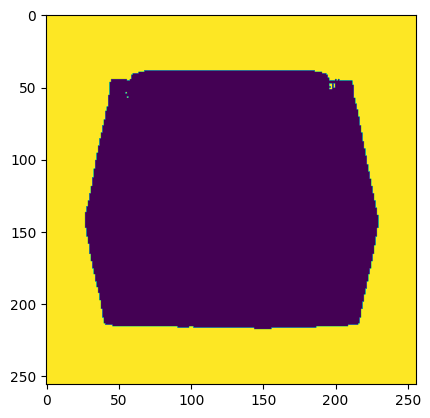

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
smap = np.isclose(normal_image.sum(axis=-1), 3.0)
plt.imshow(smap)

In [13]:
mesh = model.to_mesh(resolution=128)
mesh.show()

  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:06<00:00,  4.99it/s]
